In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [21]:
iceflow_file = Dataset("C:\\Users\\rj\\Documents\\cresis\\iceflow\\antarctic_ice_vel_phase_map_v01.nc", "r")

# the dictionary keys are ['coord_system', 'x', 'y', 'lat', 'lon', 'VX', 'VY', 'STDX', 'STDY', 'ERRX', 'ERRY', 'CNT', 'SOURCE']
print(iceflow_file.variables.keys())
print()

# print the coordinate system
print(iceflow_file.variables['coord_system'])
# it outputs coord_system()
#     ellipsoid: WGS84
#     false_easting: 0.0
#     false_northing: 0.0
#     grid_mapping_name: polar_stereographic
#     longitude_of_projection_origin: 0.0
#     latitude_of_projection_origin: -90.0
#     standard_parallel: -71.0
#     straight_vertical_longitude_from_pole: 0.0
# unlimited dimensions: 
# current shape = ()
# filling on, default _FillValue of   used

# put the data in a numpy array with columns for the lat, lon, vx, vy
# data = np.zeros((len(lat), 4))

# get the data
x = iceflow_file.variables['x'][:]
y = iceflow_file.variables['y'][:]
velocity_x = iceflow_file.variables['VX'][:]
velocity_y = iceflow_file.variables['VY'][:]
latitude = iceflow_file.variables['lat'][:]
longitude = iceflow_file.variables['lon'][:]

# get every 100th point's data
# vx = iceflow_file.variables['VX'][::100]
# vy = iceflow_file.variables['VY'][::100]
# lat = iceflow_file.variables['lat'][::100]
# lon = iceflow_file.variables['lon'][::100]

dict_keys(['coord_system', 'x', 'y', 'lat', 'lon', 'VX', 'VY', 'STDX', 'STDY', 'ERRX', 'ERRY', 'CNT', 'SOURCE'])

<class 'netCDF4._netCDF4.Variable'>
|S1 coord_system()
    ellipsoid: WGS84
    false_easting: 0.0
    false_northing: 0.0
    grid_mapping_name: polar_stereographic
    longitude_of_projection_origin: 0.0
    latitude_of_projection_origin: -90.0
    standard_parallel: -71.0
    straight_vertical_longitude_from_pole: 0.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used


### Making the Data Searchable

In [3]:
# get the shape of vx
print(latitude.shape)

(12445, 12445)


In [4]:
# print(latitude[6000][6000])
# print(longitude[6000][6000])
# print(velocity_x[6000][6000])
# print(velocity_y[6000][6000])
print(f"Latitude: {latitude[6000][6000]}, Longitude: {longitude[6000][6000]}, Velocity X: {velocity_x[6000][6000]}, Velocity Y: {velocity_y[6000][6000]}")

Latitude: -88.69846049171832, Longitude: 314.9999996514135, Velocity X: -5.1597676277160645, Velocity Y: 10.25993824005127


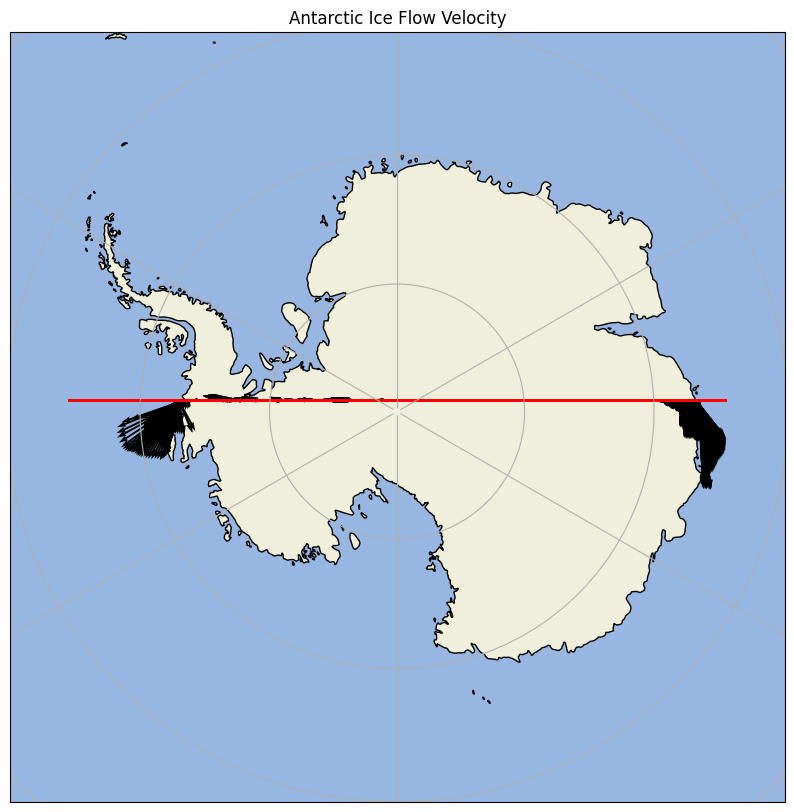

In [17]:
# plot every 100th point and draw the velocity vector at that point
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()
ax.set_title('Antarctic Ice Flow Velocity')
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# plot the 6000th point and draw the velocity vector at that point
i = 6000
# for j in range(0, len(latitude[i]), 3):
ax.plot(longitude[i], latitude[i], 'ro', markersize=1, transform=ccrs.PlateCarree())
ax.quiver(longitude[i], latitude[i], velocity_x[i], velocity_y[i], transform=ccrs.PlateCarree())
# i += 1000

# i = 6000
# ax.plot(lon[i], lat[i], 'ro', markersize=1, transform=ccrs.PlateCarree())
    
plt.show()

In [18]:
print(velocity_x[6000][6000])

-5.1597676


In [19]:
print(longitude[6000][6000])
print(longitude[6000][6100])
print(longitude[6100][6000])

314.9999996514135
331.189206033848
298.810793268979


In [35]:
print(x[6222])
# print(x[6000][6100])
# print(x[6100][6000])
# print size of x
print(x.shape)

-100.0
(12445,)


### The spatial resolution of the grid is 450 m by 450 m.
<img src="geolocation_table.png">